# Exponential Model for COVID-19 virus spread: Hypothetical

### Using Scipy curve fitting

Data Source: 
  * [worldometers](https://www.worldometers.info/coronavirus/coronavirus-cases/)
  
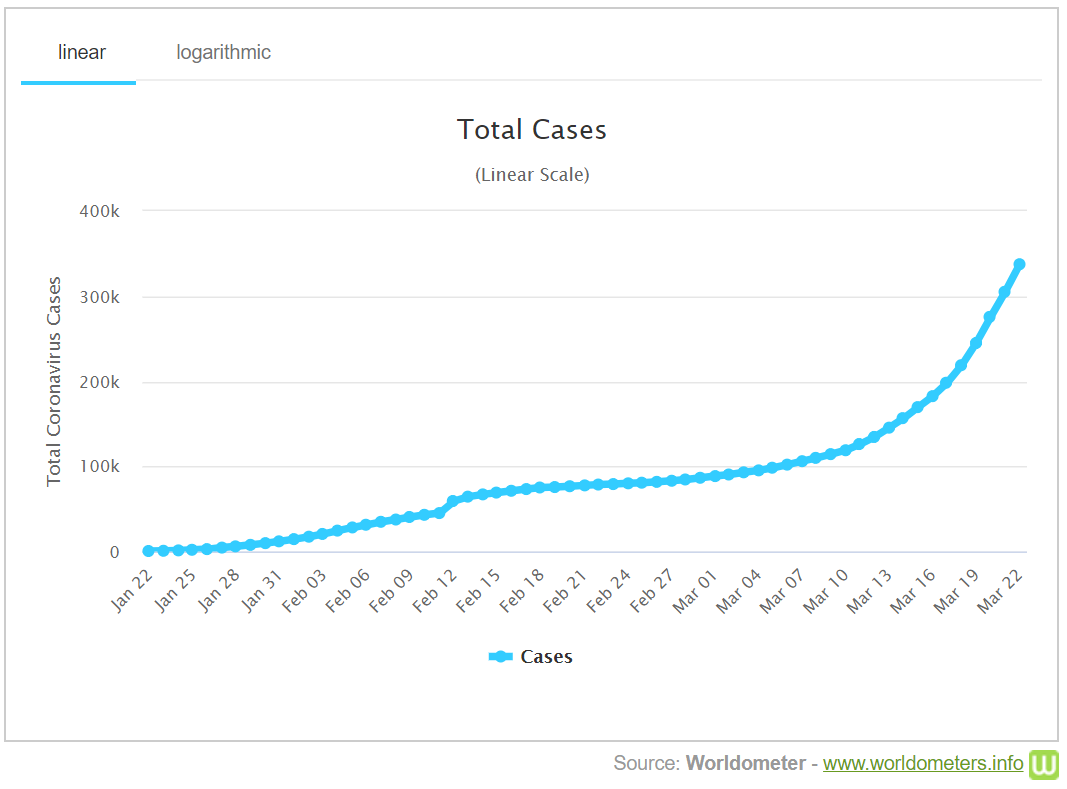  

<small> @author:Rajesh Swarnkar &lt;rjs.swarnkar@gmail.com&gt; </small>

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go 
import plotly.offline as pyo

In [2]:
df = pd.read_csv("corona-cases.csv")

In [3]:
df.head()

,day,CoronaCases
0,1,67100
1,2,69197
2,3,71329
3,4,73332
4,5,75184


In [4]:
df.describe()

,day,CoronaCases
count,38.000000,38.000000
mean,19.500000,125091.315789
std,11.113055,69442.716075
min,1.000000,67100.000000
25%,10.250000,79425.500000
50%,19.500000,94165.000000
75%,28.750000,142756.250000
max,38.000000,337469.000000


In [5]:
data = [go.Scatter(x=df.index,y=df['CoronaCases'])]
layout = go.Layout(title="Corona Cases")
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename="corona-cases.html")

'corona-cases.html'

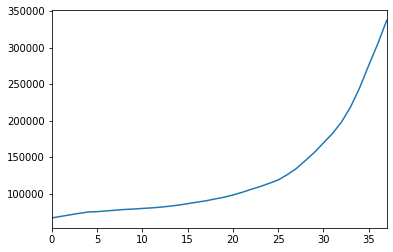

In [6]:
df['CoronaCases'].plot()

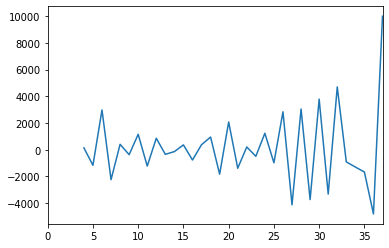

In [7]:
df['CoronaCases'].diff().diff().diff().diff().plot() # Differentiate 3-4 Times yields somewhat stationary 

In [8]:
# Snippet Copied from https://machinelearningmastery.com/time-series-data-stationary-python/
# Augmented Dickey Fuller Test for Stationarity
from statsmodels.tsa.stattools import adfuller

X = df['CoronaCases'].diff().diff().diff().diff().dropna().values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.379282
p-value: 0.000000
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


## Curve Fitting using scipy

In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cvfit

In [10]:
x_data =  df['day'].values

In [11]:
y_data = df['CoronaCases'].values

In [22]:
def func1(x, a, b, c):
    return a * np.exp(b * x) + c

def func2(x, a, b):
    return a * np.exp(b * x)


# y = a(1 + r)^b : https://mathbitsnotebook.com/Algebra2/Exponential/EXGrowthDecay.html
# r is the rate of growth
def func3(x, a, r):
    return a * np.power(1+r,x)

def exp_fx(t,N0,tau):
    return N0*np.exp(t/tau)

In [30]:
# Fit func1
param, param_cov = cvfit(func1, x_data, y_data) 

# Fit func3
# param, param_cov = cvfit(func3, x_data, y_data) 

print(param)
print(param_cov)

[1.11283550e+03 1.43981203e-01 7.33841884e+04]
[[ 6.71933371e+03 -1.62617948e-01 -4.56337145e+04]
 [-1.62617948e-01  3.96166295e-06  1.06167678e+00]
 [-4.56337145e+04  1.06167678e+00  5.47366118e+05]]


In [31]:
# func1 evaluation
ans = param[0] * np.exp(param[1]*x_data) + param[2]

# func 3 evaluation
# ans = param[0] * np.power(1+param[1],x_data)

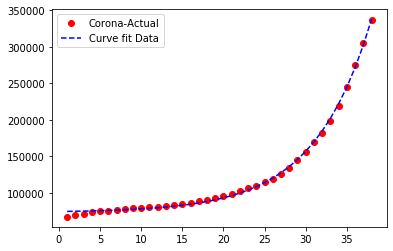

In [32]:
plt.plot(x_data, y_data, 'o', color ='red', label ="Corona-Actual") 
plt.plot(x_data, ans, '--', color ='blue', label ="Curve fit Data") 
plt.legend() 
plt.show() 

In [33]:
trace1 = go.Scatter(x=df.index,y=df['CoronaCases'],name="Actual")
trace2 = go.Scatter(x=df.index,y=ans, name="Modeled")
data = [trace1, trace2]
layout = go.Layout(title="Corona Cases")
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename="corona-cases.html")

'corona-cases.html'

## Thus the parameters of exponential curve fitting is : 

### Conclusion: Hypothetical Mathemathetical Model for Corona Spread is:  

\begin{equation} N(t)  = 1112.83 * e^{t*0.143981} + 73384.18 \end{equation}




#### Prediction for 23rd March, 2020:

In [168]:
# t = 39

nt = 1.11283550e+03 * np.exp(1.43981203e-01 * 39) + 7.33841884e+04
print("Hypothetical Estimation: "+str(nt))

Hypothetical Estimation: 378953.9728796021


### Hypothetical Extrpolation 
Extrapolating the current situation

In [46]:
x_hypo = np.arange(1,59)
x_hypo

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [47]:
y_hypo = 1.11283550e+03 * np.exp(1.43981203e-01 * x_hypo) + 7.33841884e+04

In [57]:
trace1 = go.Scatter(x=x_hypo,y=df['CoronaCases'],name="Actual", line = dict(color='red', width=4, dash='dot') )
trace2 = go.Scatter(x=x_hypo,y=y_hypo, name="Modeled", mode='lines+markers', line = dict(color='lightgray'))
data = [trace2, trace1]
layout = go.Layout(title="Corona Cases - Actual vs Hypothetical")
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename="corona-cases-extrapolated.html")

'corona-cases-extrapolated.html'

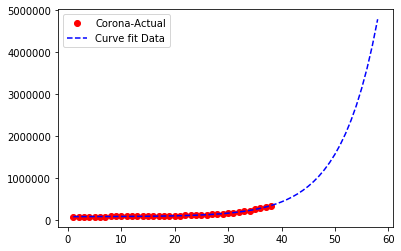

In [59]:
plt.plot(x_data, y_data, 'o', color ='red', label ="Corona-Actual") 
plt.plot(x_hypo, y_hypo, '--', color ='blue', label ="Curve fit Data") 
plt.legend() 
plt.show() 

# Conclusion 2: 

## For next 10 Days, i.e. by 3rd April, 2020, if such spread continues, then this will cross _1 Million_ cases.  